# Assignment 1 : which country has the most video uploads per capita 


In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [55]:
#Read the cleaned CSV file into dataframe 
clean_youtube_df = pd.read_csv("Global_YouTube_Statistics.csv")
pd.options.display.float_format = "{:,.3f}".format

clean_youtube_df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,1,6800000,108400000,2006,Mar,28.100,1366417754,5.360,20.594,78.963
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,7670,0,0,2006,Mar,88.200,328239523,14.700,37.090,-95.713
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,1,4000000,64700000,2012,Feb,88.200,328239523,14.700,37.090,-95.713
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,2,5900000,94800000,2006,Sep,88.200,328239523,14.700,37.090,-95.713
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,2,5500000,87500000,2006,Sep,28.100,1366417754,5.360,20.594,78.963


In [30]:
#number of countries
countries_total = len(clean_youtube_df.groupby("Country").count())
print(f" The total number of countries in this dataset is : {countries_total}")

 The total number of countries in this dataset is : 48


In [31]:
#country rank 
countries_rank = clean_youtube_df.sort_values(["country_rank"],ascending=False)
print(f" Top 10 highest ranking countries on Youtube")
countries_rank.head(10)

 Top 10 highest ranking countries on Youtube


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
335,412,Official Pink Panther,19700000,10955619815,Film & Animation,OfficialPinkPanther,1,United States,7741,0,0,2011,Oct,88.200,328239523,14.700,37.090,-95.713
135,165,Talking Tom,30200000,15199330166,Comedy,TalkingTom,2,United States,7736,0,0,2008,Jun,88.200,328239523,14.700,37.090,-95.713
338,415,AS Gaming,19600000,2851024430,Gaming,ASGaming,17,United States,7711,0,1,2009,Mar,88.200,328239523,14.700,37.090,-95.713
241,300,Alan Becker,22900000,5380073627,Film & Animation,Alan Becker,0,United States,7700,0,0,2006,Mar,88.200,328239523,14.700,37.090,-95.713
559,681,TheRichest,15000000,2730879024,Education,Therichest,0,United States,7692,0,0,2006,May,88.200,328239523,14.700,37.090,-95.713
737,887,Ryan Trahan,13100000,2182651464,Entertainment,Ryan Trahan,33,United States,7683,0,12,2022,Jun,88.200,328239523,14.700,37.090,-95.713
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,7670,0,0,2006,Mar,88.200,328239523,14.700,37.090,-95.713
388,480,And TV,18000000,15412333005,Entertainment,ANDtv,45,United States,7627,0,0,2006,Aug,88.200,328239523,14.700,37.090,-95.713
713,860,The Q,13400000,4306212515,People & Blogs,Tom Duggan,96,United States,7615,0,0,2006,Jan,88.200,328239523,14.700,37.090,-95.713
636,770,Rebecca Zamolo,14300000,6388439235,Comedy,RebeccaZamolo,1,United States,6342,0,0,2011,Aug,88.200,328239523,14.700,37.090,-95.713


In [60]:
#create a new dataframe that only reflects the variables needed for this question

new_youtube_df = pd.DataFrame({
    "Youtuber" : [Youtuber ],
    "Subscribers" : [subscribers],
    "Uploads" : [uploads],
    "Country" : [Country],
    "Country rank" : [country_rank],
    "Population" : [Population]
})

new_youtube_df

NameError: name 'Youtuber' is not defined

In [32]:
#most uploads
top_uploads = clean_youtube_df.sort_values(["uploads"],ascending=False)
top_uploads.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
81,96,ABP NEWS,37000000,13102611515,People & Blogs,ABP NEWS,301308,India,25,801200,12800000,2012,Jun,28.100,1366417754,5.360,20.594,78.963
711,858,GMA Integrated News,13400000,9569814790,News & Politics,GMA Integrated News,296272,Philippines,10,346400,5500000,2007,Oct,35.500,108116615,2.150,12.880,121.774
619,748,TV9 Bharatvarsh,14500000,10303519926,People & Blogs,TV9 Bharatvarsh,293516,India,106,1300000,20100000,2018,Nov,28.100,1366417754,5.360,20.594,78.963
29,34,Aaj Tak,57600000,25307753534,News & Politics,Aaj Tak,283775,India,13,1400000,22100000,2009,Aug,28.100,1366417754,5.360,20.594,78.963
88,108,IndiaTV,35500000,16105023749,News & Politics,IndiaTV,273255,India,27,872500,14000000,2006,Aug,28.100,1366417754,5.360,20.594,78.963
567,690,KOMPASTV,15000000,11827310821,News & Politics,KOMPASTV,269050,Indonesia,25,339200,5400000,2013,Aug,36.300,270203917,4.690,-0.789,113.921
478,587,Thairath Online,16200000,14563841315,News & Politics,Thairath Online,244899,Thailand,10,674300,10800000,2010,Sep,49.300,69625582,0.750,15.870,100.993
406,503,News 24,17700000,8396875537,News & Politics,24 ï¿½ï¿½ï¿½ï,211620,Ukraine,24,1100000,17800000,2006,Feb,82.700,44385155,8.880,48.379,31.166
552,674,ABS-CBN News,15100000,10489367372,News & Politics,ABS-CBN News,209520,Philippines,7,544900,8700000,2009,Oct,35.500,108116615,2.150,12.880,121.774
71,85,TEDx Talks,38600000,7339333120,Nonprofits & Activism,TEDx Talks,200933,United States,25,136900,2200000,2009,Jun,88.200,328239523,14.700,37.090,-95.713


In [33]:
#population dataset

population_of_country = clean_youtube_df.sort_values(["Population"],ascending=False)
population_of_country.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
411,508,ýýýýýýýýý Liziqi,17600000,2977741577,Howto & Style,ýýýýýýýýý Liziqi,128,China,1,67100,1100000,2017,Aug,50.600,1397715000,4.320,35.862,104.195
434,534,Prajapati News,17000000,1001465469,Comedy,Prajapati News,1407,India,89,22900,366100,2013,Mar,28.100,1366417754,5.360,20.594,78.963
344,421,DLS News,19400000,2255542592,News & Politics,DLS News,4750,India,74,96300,1500000,2017,Jul,28.100,1366417754,5.360,20.594,78.963
346,423,etvteluguindia,19400000,23038014291,Entertainment,etvteluguindia,125974,India,75,818800,13100000,2010,Mar,28.100,1366417754,5.360,20.594,78.963
349,429,Sonotek,19200000,7590582024,Entertainment,Sonotek,8285,India,77,86000,1400000,2011,Jan,28.100,1366417754,5.360,20.594,78.963
354,436,Wow Kidz Action,19000000,8281724393,Film & Animation,Wow Kidz Action,1525,India,78,317100,5100000,2017,Nov,28.100,1366417754,5.360,20.594,78.963
364,449,Triggered Insaan,18800000,3276891538,Comedy,Triggered Insaan,304,India,79,327100,5200000,2014,Jul,28.100,1366417754,5.360,20.594,78.963
366,452,Shemaroo Comedy,18600000,6047584292,Entertainment,Shemaroo Comedy,4487,India,81,307300,4900000,2007,Jan,28.100,1366417754,5.360,20.594,78.963
400,494,Priyal Kukreja,17800000,11057945183,People & Blogs,Priyal Kukreja,772,India,83,1300000,20700000,2021,Apr,28.100,1366417754,5.360,20.594,78.963
403,499,jaanvi patel,17700000,7912733203,People & Blogs,jaanvi patel,512,India,84,1000000,16600000,2018,Jul,28.100,1366417754,5.360,20.594,78.963


In [46]:
#uploads per capita 

clean_youtube_df["uploads_per_capita"] = clean_youtube_df["uploads"] / clean_youtube_df["Population"]

top_uploads_per_capita = clean_youtube_df.sort_values(["uploads_per_capita"],ascending =False)
top_uploads_per_capita



,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude,uploads_per_capita
763,918,AlArabiya ï¿½ï¿½ï¿½ï¿½ï¿,12900000,7520379951,People & Blogs,AlArabiya ï¿½ï¿½ï¿½ï¿½ï¿,169304,United Arab Emirates,8,240700,3900000,2006,Sep,36.800,9770529,2.350,23.424,53.848,0.017
479,588,LEGO,16200000,20522339099,Entertainment,LEGO,31889,Singapore,1,351600,5600000,2005,Oct,84.800,5703569,4.110,1.352,103.820,0.006
406,503,News 24,17700000,8396875537,News & Politics,24 ï¿½ï¿½ï¿½ï,211620,Ukraine,24,1100000,17800000,2006,Feb,82.700,44385155,8.880,48.379,31.166,0.005
478,587,Thairath Online,16200000,14563841315,News & Politics,Thairath Online,244899,Thailand,10,674300,10800000,2010,Sep,49.300,69625582,0.750,15.870,100.993,0.004
711,858,GMA Integrated News,13400000,9569814790,News & Politics,GMA Integrated News,296272,Philippines,10,346400,5500000,2007,Oct,35.500,108116615,2.150,12.880,121.774,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,607,ýýýýýýýýýý,15900000,1845329502,People & Blogs,Kung Fu Padla,0,Russia,3309,0,0,2017,May,81.900,144373535,4.590,61.524,105.319,0.000
487,601,La Rosa de Guadalupe,16100000,9642146451,Entertainment,larosadeguadalupe,0,Mexico,4258,0,0,2008,Sep,40.200,126014024,3.420,23.635,-102.553,0.000
449,555,Werever2morro,16600000,2798273962,Entertainment,werever2morro,0,Mexico,4248,0,0,2010,Dec,40.200,126014024,3.420,23.635,-102.553,0.000
305,378,Linkin Park,20400000,13397000296,Music,linkinpark,0,Afghanistan,1385,0,0,2006,Nov,9.700,38041754,11.120,33.939,67.710,0.000


In [47]:
#the country with the highest uploads per capita 
top_country = top_uploads_per_capita.iloc[0]
print(f"The country with the most video uploads per capita is {top_country['Country']} with {top_country["uploads_per_capita"]:.2f} uploads per capita.")

The country with the most video uploads per capita is United Arab Emirates with 0.02 uploads per capita.


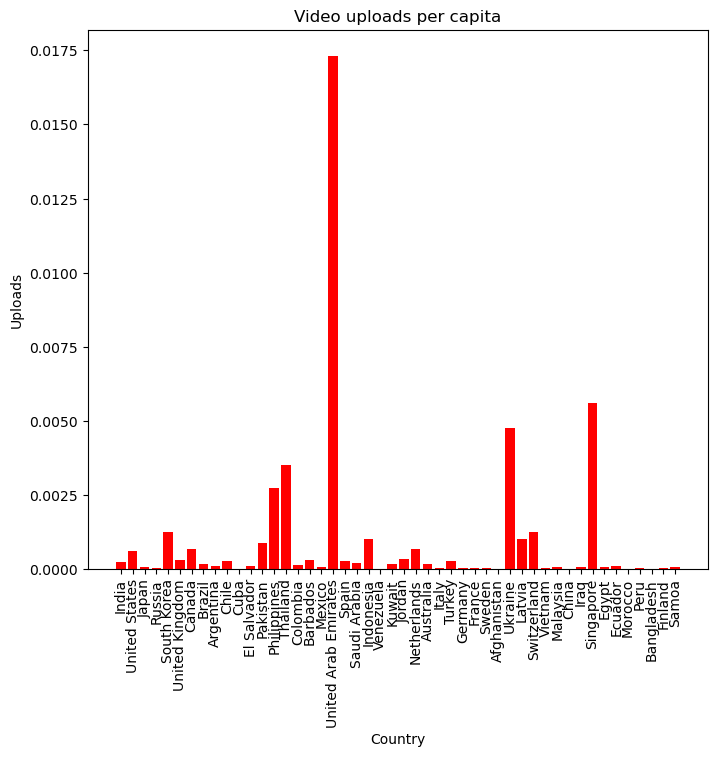

In [53]:
#graph 1 ??

plt.figure(figsize=(8, 7))
plt.bar(clean_youtube_df["Country"], clean_youtube_df["uploads_per_capita"],color = "red")
plt.xlabel("Country")
plt.ylabel("Uploads")  
plt.title("Video uploads per capita")
plt.xticks(rotation=90)  
plt.show()